<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/FINAL_AXIS_PREDICTIONS_NO_TRANSFORMATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
ak_train = pd.read_excel('AK TRAINSET.xlsx')
ak_test = pd.read_excel('AK TESTSET.xlsx')
our_train = pd.read_excel('OG TRAINSET.xlsx')
our_test = pd.read_excel('OG TESTSET.xlsx')

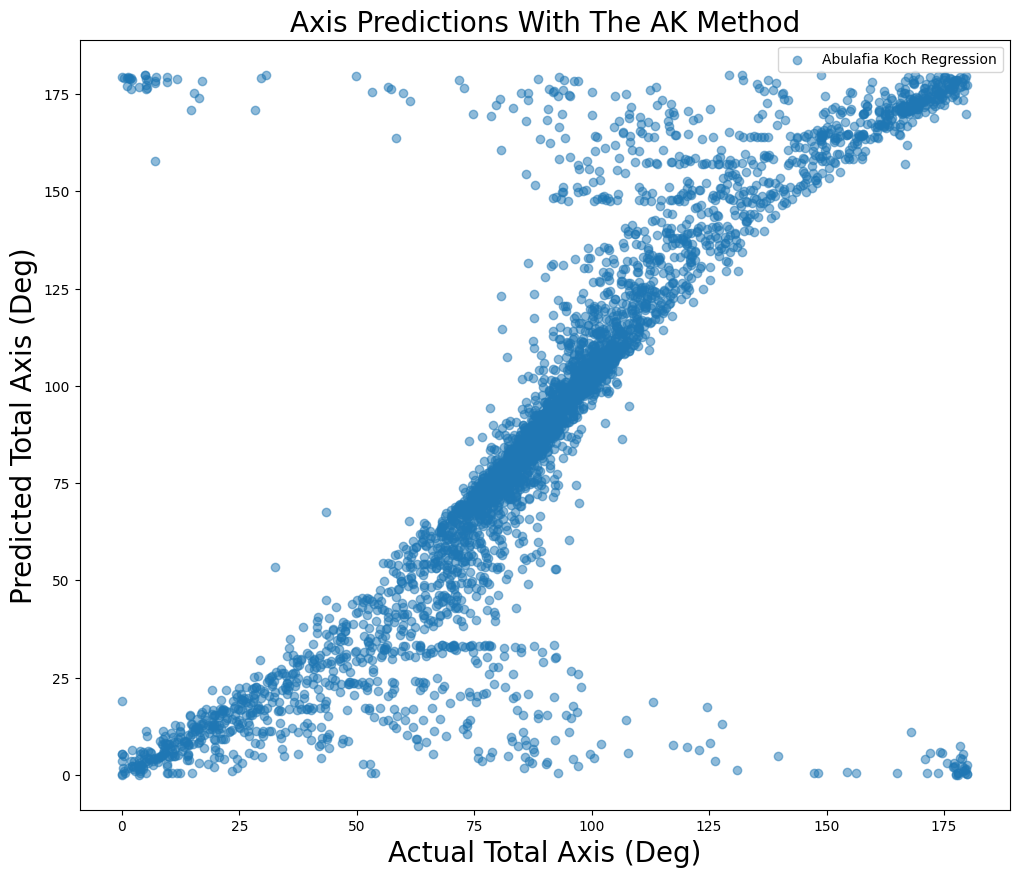

In [3]:
fig = plt.subplots(figsize=(12,10))

# plot actual vs predicted values
plt.scatter(our_test['Axis Total '],ak_test['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA
plt.xlabel('Actual Total Axis (Deg)',size=20)
plt.ylabel('Predicted Total Axis (Deg)',size=20)
plt.title('Axis Predictions With The AK Method',size=20)
plt.legend()
plt.show()

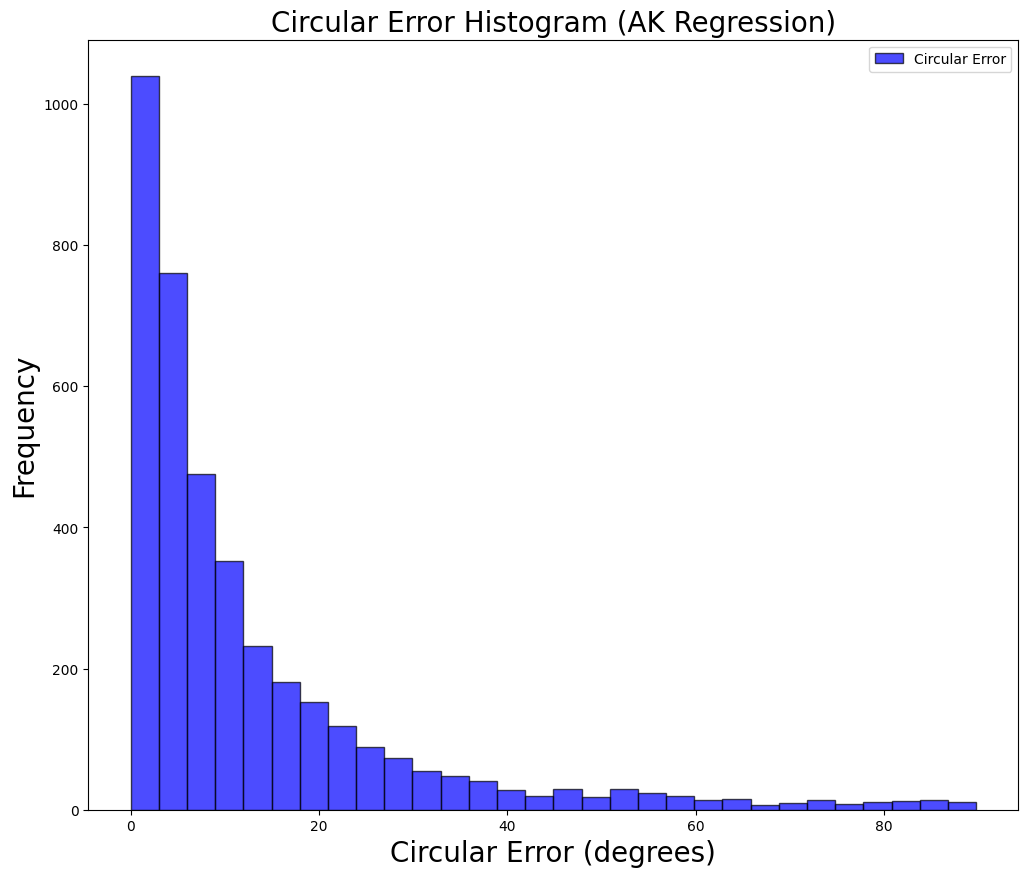

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the circular error (shortest angular distance) between actual and predicted
def circular_error(actual, predicted):
    error = np.abs(predicted - actual)
    return np.minimum(error, 180 - error)

# Calculate the circular error for the dataset
ak_test['Circular Error'] = circular_error(our_test['Axis Total '], ak_test['Total Corneal Axis Final (reconstructed)'])

# Create a histogram plot for the circular error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(ak_test['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')

# Set labels and title
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (AK Regression)', size=20)
plt.legend()
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

In [7]:
X2 = our_train.drop('Axis Total ', axis=1).values
y2 = our_train['Axis Total '].values

In [8]:
X2_train = torch.tensor(X2, dtype=torch.float32)
y2_train = torch.tensor(y2, dtype=torch.float32)

In [9]:
X3 = our_test.drop('Axis Total ', axis=1).values
y3 = our_test['Axis Total '].values

X3_test = torch.tensor(X3, dtype=torch.float32)
y3_test = torch.tensor(y3, dtype=torch.float32)

In [10]:
class RegressionModel2(nn.Module):
    def __init__(self, input_dim2, hidden_dim2, output_dim2):
        super(RegressionModel2, self).__init__()
        self.fc1 = nn.Linear(input_dim2, hidden_dim2)
        self.relu1 = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_dim2, output_dim2)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim2)  # Batch normalization

    def forward(self, x2):
        out = self.fc1(x2)
        out = self.relu1(out)
        out = self.batch_norm1(out)
        out = self.fc2(out)
        return out

In [11]:
input_dim2 = X2_train.shape[1] # change to [1] for pentacam dataset X_train.shape[1]
hidden_dim2 = 32 # Was 16
output_dim2 = 1

model2 = RegressionModel2(input_dim2, hidden_dim2, output_dim2)

In [12]:
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01, weight_decay=1e-5)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

num_epochs = 500

# initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
    # Forward pass - Training phase
    outputs_train = model2(X2_train)
    loss_train = criterion2(outputs_train, y2_train.unsqueeze(1))
    accuracy_train = r2_score(y2_train.numpy(), outputs_train.detach().numpy())

    # Backward and optimize
    optimizer2.zero_grad()
    loss_train.backward()
    optimizer2.step()

    # Forward pass - Testing phase
    outputs_test = model2(X3_test)
    loss_test = criterion2(outputs_test, y3_test.unsqueeze(1))
    accuracy_test = r2_score(y3_test.numpy(), outputs_test.detach().numpy())

    # append loss and accuracy values to lists
    train_loss.append(loss_train.item())
    train_accuracy.append(accuracy_train)
    test_loss.append(loss_test.item())
    test_accuracy.append(accuracy_test)

    if (epoch + 1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.4f}, Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(
            epoch + 1, num_epochs, loss_train.item(), accuracy_train, loss_test.item(), accuracy_test))

Epoch [10/500], Train Loss: 9245.5596, Train Accuracy: -5.4646, Test Loss: 9278.2910, Test Accuracy: -5.7961
Epoch [20/500], Train Loss: 8953.0088, Train Accuracy: -5.2601, Test Loss: 8972.6885, Test Accuracy: -5.5722
Epoch [30/500], Train Loss: 8505.2773, Train Accuracy: -4.9470, Test Loss: 8506.6943, Test Accuracy: -5.2309
Epoch [40/500], Train Loss: 7872.3262, Train Accuracy: -4.5045, Test Loss: 7844.3340, Test Accuracy: -4.7457
Epoch [50/500], Train Loss: 7064.7783, Train Accuracy: -3.9398, Test Loss: 7025.4058, Test Accuracy: -4.1459
Epoch [60/500], Train Loss: 6137.7417, Train Accuracy: -3.2916, Test Loss: 6081.6260, Test Accuracy: -3.4546
Epoch [70/500], Train Loss: 5138.5908, Train Accuracy: -2.5930, Test Loss: 5068.7280, Test Accuracy: -2.7127
Epoch [80/500], Train Loss: 4123.8374, Train Accuracy: -1.8835, Test Loss: 4049.0164, Test Accuracy: -1.9658
Epoch [90/500], Train Loss: 3171.7346, Train Accuracy: -1.2177, Test Loss: 3095.3613, Test Accuracy: -1.2673
Epoch [100/500], Tr

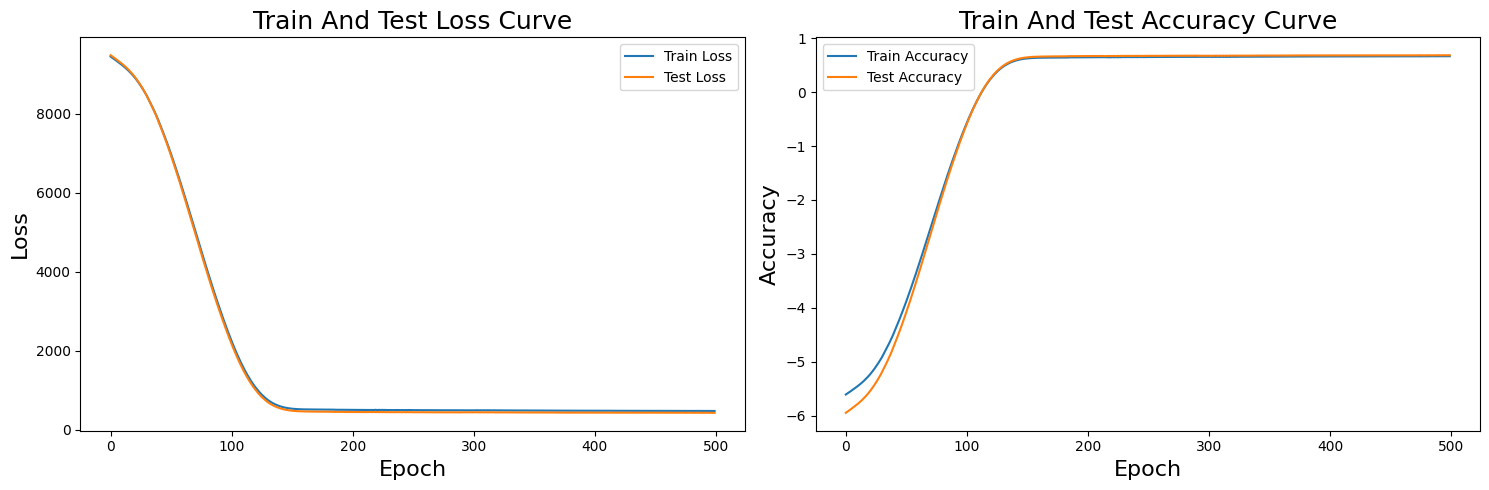

In [14]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training loss
ax1.plot(train_loss, label='Train Loss')
ax1.plot(test_loss, label='Test Loss')
ax1.set_xlabel('Epoch',size=16)
ax1.set_ylabel('Loss',size=16)
ax1.set_title('Train And Test Loss Curve',size=18)
ax1.legend()

# Plot testing loss
ax2.plot(train_accuracy, label='Train Accuracy')
ax2.plot(test_accuracy, label='Test Accuracy')
ax2.set_xlabel('Epoch',size=16)
ax2.set_ylabel('Accuracy',size=16)
ax2.set_title('Train And Test Accuracy Curve',size=18)
ax2.legend()

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

# Convert lists to NumPy arrays for convenience
y2_train_np = y2_train.numpy()
outputs_train_np = outputs_train.detach().numpy()

y3_test_np = y3_test.numpy()
outputs_test_np = outputs_test.detach().numpy()

# Calculate RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y2_train_np, outputs_train_np))

# Calculate R-squared for training set
r2_train = r2_score(y2_train_np, outputs_train_np)

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y3_test_np, outputs_test_np))

# Calculate R-squared for test set
r2_test = r2_score(y3_test_np, outputs_test_np)

# Print results
print('Training RMSE: {:.4f}, Training R-squared: {:.4f}'.format(rmse_train, r2_train))
print('Test RMSE: {:.4f}, Test R-squared: {:.4f}'.format(rmse_test, r2_test))

Training RMSE: 21.8858, Training R-squared: 0.6651
Test RMSE: 20.8089, Test R-squared: 0.6828


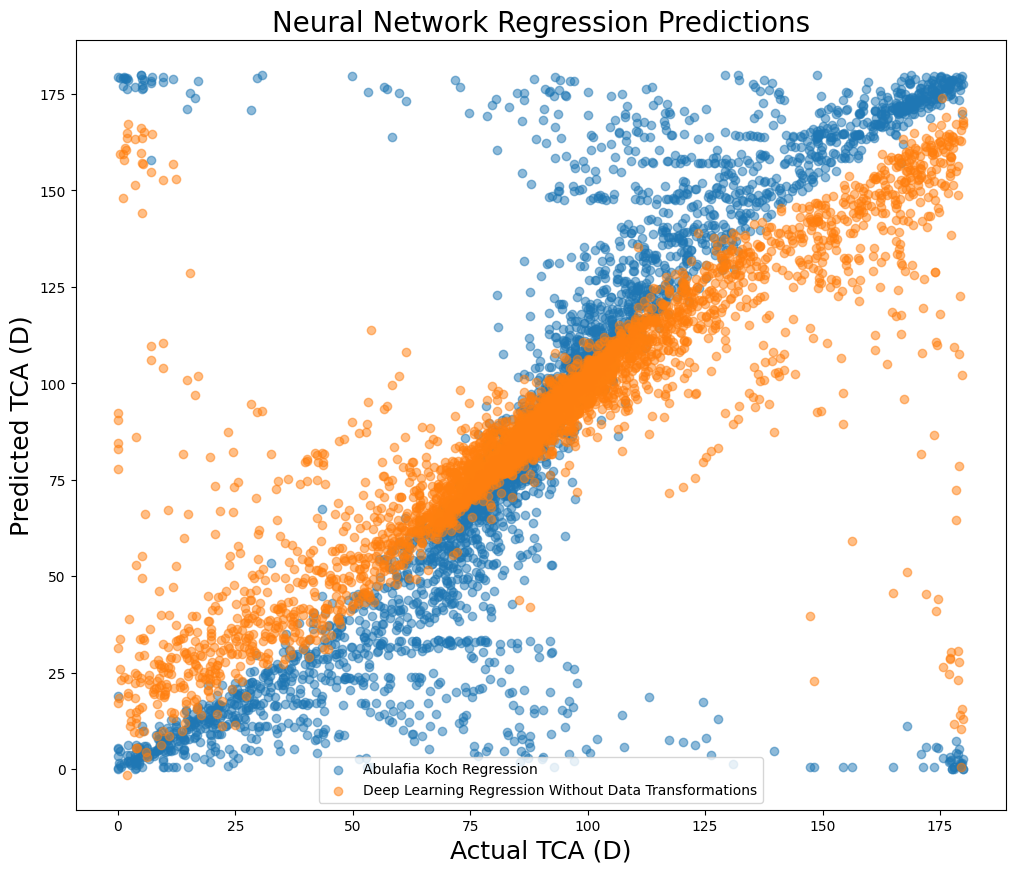

In [18]:
# get predicted values from the model
with torch.no_grad():
    predicted2 = model2(X3_test)

# convert tensor to numpy array
predicted2 = predicted2.numpy()

fig = plt.subplots(figsize=(12,10))

# plot actual vs predicted values
plt.scatter(our_test['Axis Total '],ak_test['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA
plt.scatter(y3_test, predicted2, alpha=0.5, label='Deep Learning Regression Without Data Transformations')
plt.xlabel('Actual TCA (D)',size=18)
plt.ylabel('Predicted TCA (D)',size=18)
plt.title('Neural Network Regression Predictions',size=20)
plt.legend()
plt.show()

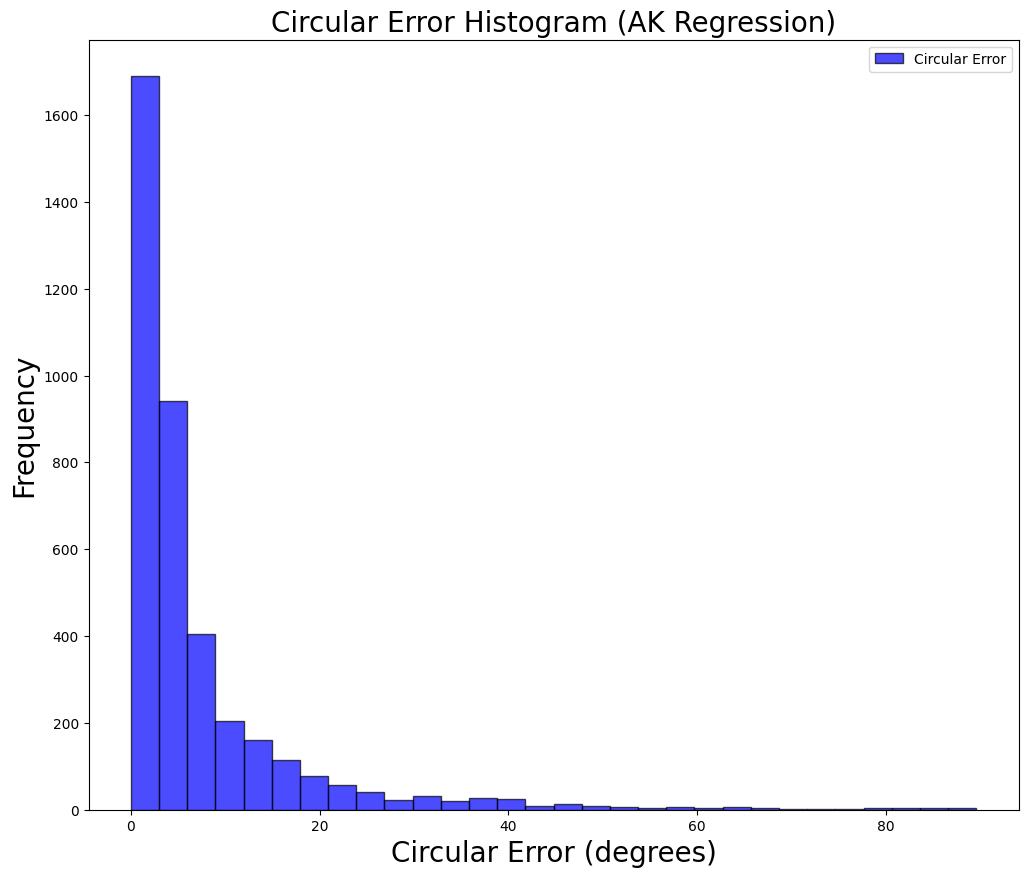

In [40]:
# Calculate the circular error for the dataset
our_test['Circular Error'] = circular_error(our_test['Axis Total '], predicted2.flatten())

# Create a histogram plot for the circular error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(our_test['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')

# Set labels and title
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (AK Regression)', size=20)
plt.legend()
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

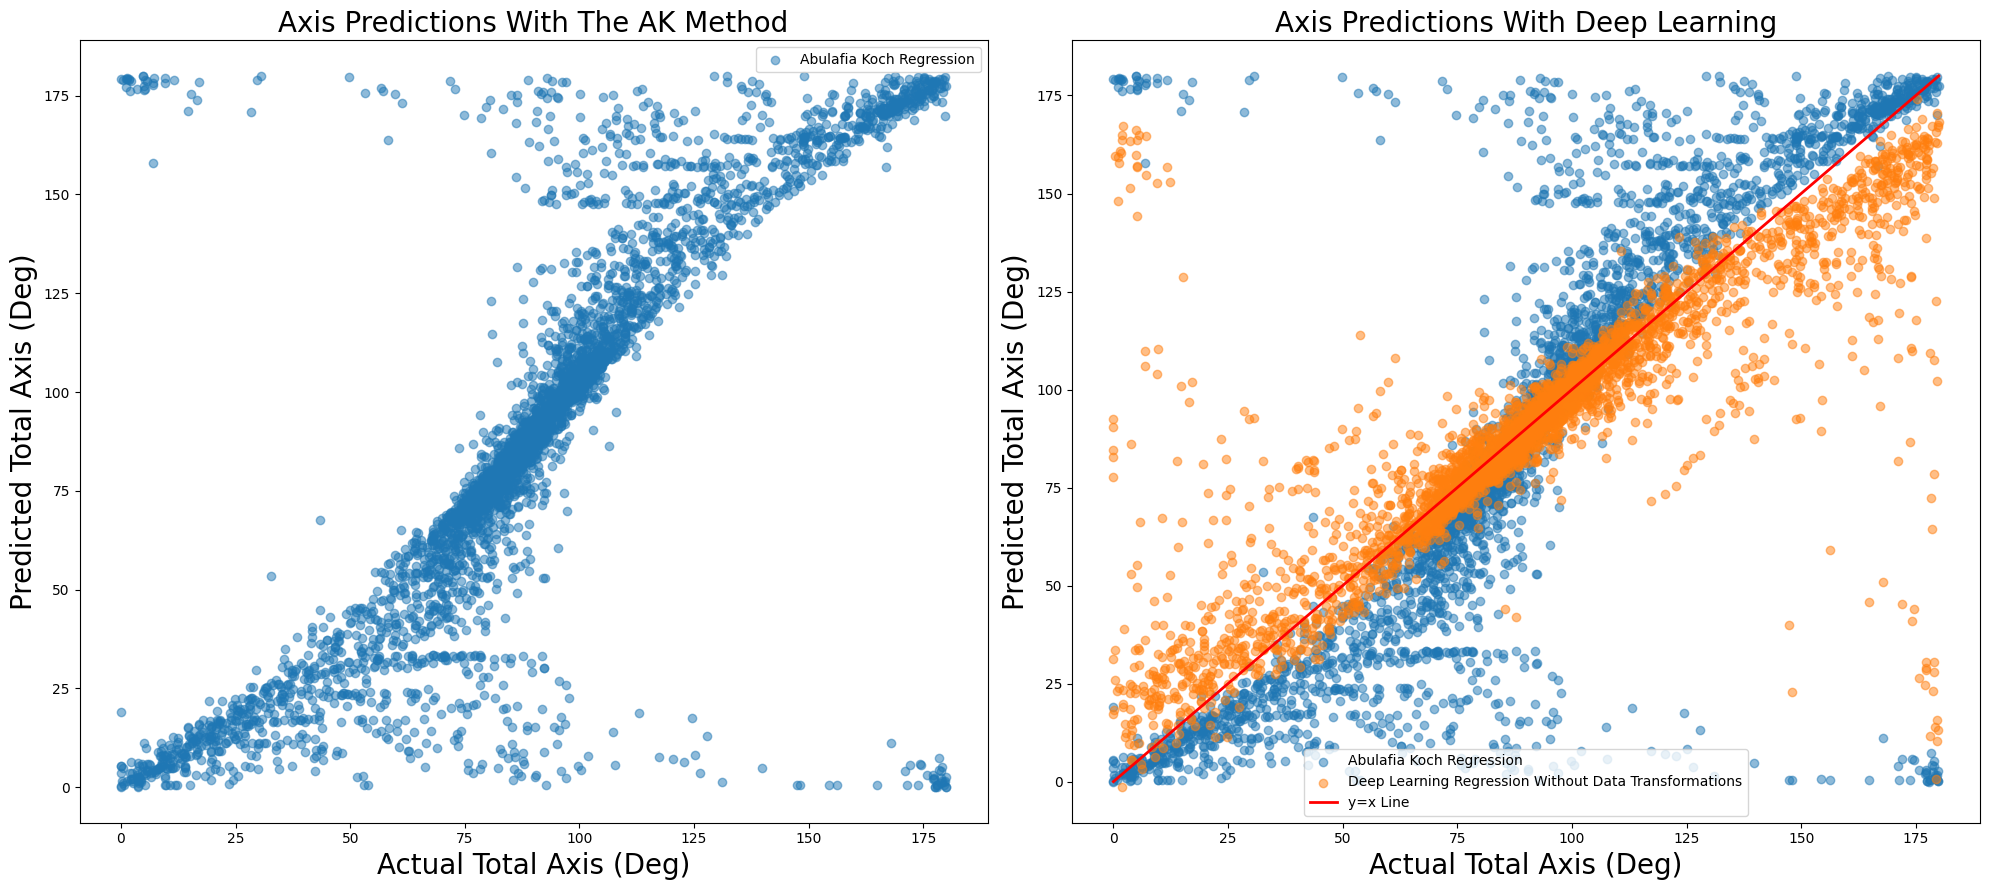

In [38]:
legend_label2 = f"NN Regression W/o Data Transformations (RMSE: {rmse_test:.4f}, R-squared: {r2_test:.4f})"

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

# Plot the first scatter plot in the first subplot
axs[0].scatter(our_test['Axis Total '],ak_test['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA
axs[0].set_xlabel('Actual Total Axis (Deg)',size=20)
axs[0].set_ylabel('Predicted Total Axis (Deg)',size=20)
axs[0].set_title('Axis Predictions With The AK Method',size=20)
axs[0].legend()

# Plot the second scatter plot in the second subplot
axs[1].scatter(our_test['Axis Total '],ak_test['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA
axs[1].scatter(y3_test, predicted2, alpha=0.5, label='Deep Learning Regression Without Data Transformations')
axs[1].set_xlabel('Actual Total Axis (Deg)',size=20)
axs[1].set_ylabel('Predicted Total Axis (Deg)',size=20)
axs[1].set_title('Axis Predictions With Deep Learning',size=20)
axs[1].legend()

# Add y=x line to the second subplot
axs[1].plot([0, 180], [0, 180], color='red', linestyle='-', linewidth=2, label='y=x Line')
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

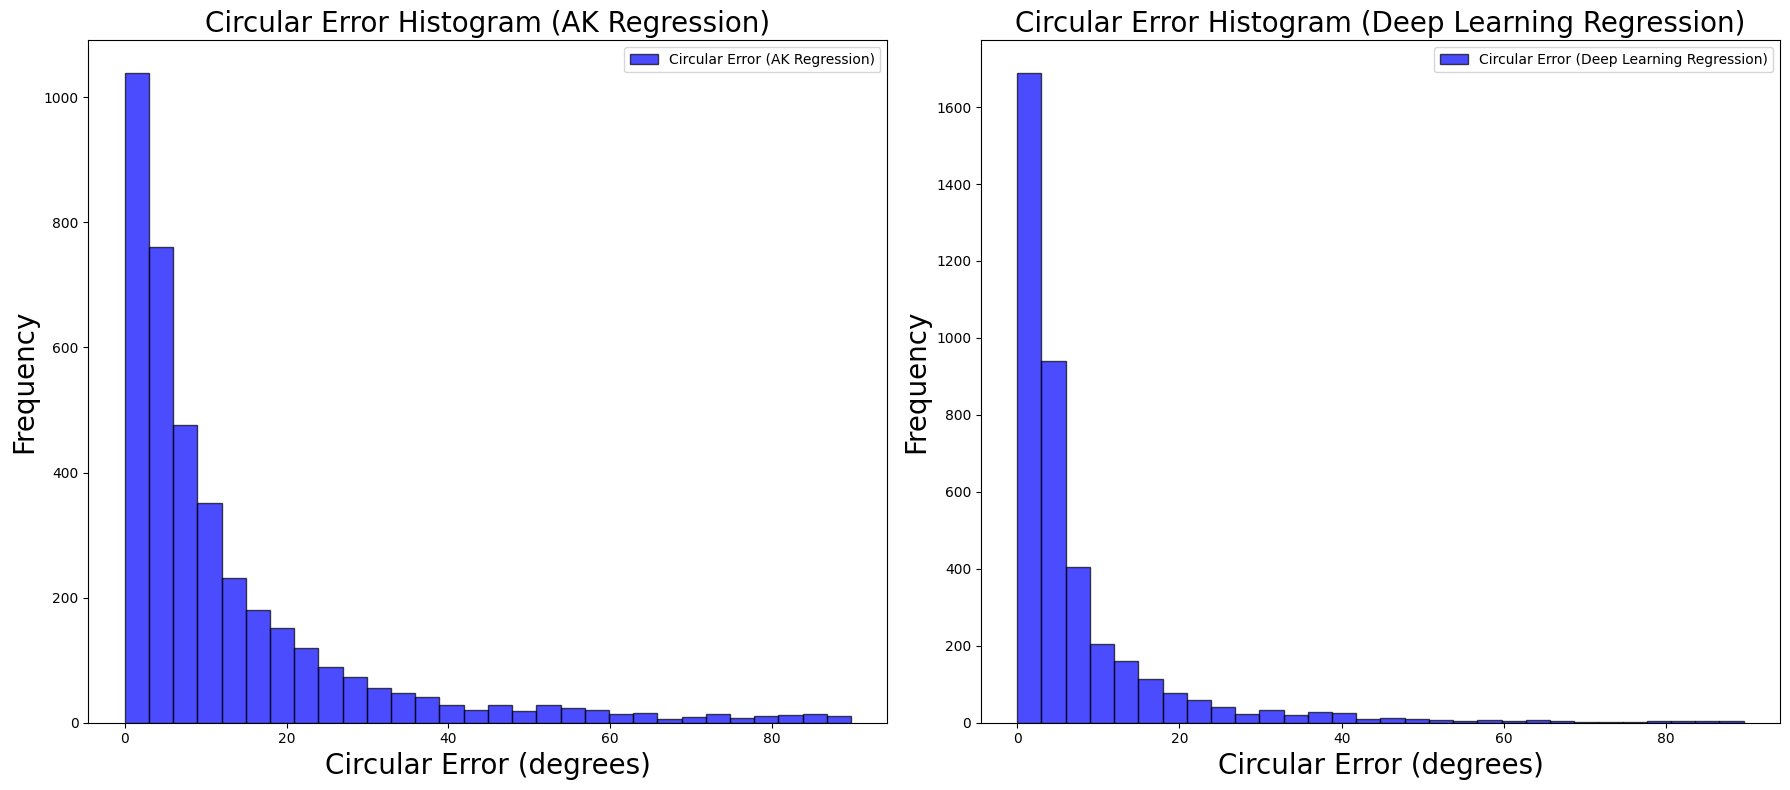

In [39]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot the histogram for AK Regression
axs[0].hist(ak_test['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error (AK Regression)')
axs[0].set_xlabel('Circular Error (degrees)', size=20)
axs[0].set_ylabel('Frequency', size=20)
axs[0].set_title('Circular Error Histogram (AK Regression)', size=20)
axs[0].legend()

# Calculate the circular error for the deep learning dataset
our_test['Circular Error'] = circular_error(our_test['Axis Total '], predicted2.flatten())

# Plot the histogram for Deep Learning Regression
axs[1].hist(our_test['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error (Deep Learning Regression)')
axs[1].set_xlabel('Circular Error (degrees)', size=20)
axs[1].set_ylabel('Frequency', size=20)
axs[1].set_title('Circular Error Histogram (Deep Learning Regression)', size=20)
axs[1].legend()

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()